# *載入所需要套件*
SGD實作


In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(10)

載入mnist資料集

In [0]:
from keras.datasets import mnist

*讀取資料集*

In [0]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

將特徵做Reshape轉換

In [0]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

將特徵標準化

In [0]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

將數字以oneHotEncoding轉換

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_test_label = np_utils.to_categorical(y_test_label)

建立Sequential()模型

In [0]:
model = Sequential()

建立輸入層隱藏層

In [0]:
model.add(Dense(units = 256,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

建立輸出層

In [0]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

# 進行訓練

In [0]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',metrics = ['accuracy'])

執行訓練程式

In [18]:
train_history = model.fit(x= x_Train_normalize,
                          y=y_Train_OneHot,validation_split = 0.2,
                          epochs = 10,batch_size = 200,verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 1.7616 - accuracy: 0.5939 - val_loss: 1.2360 - val_accuracy: 0.7819
Epoch 2/10
 - 1s - loss: 0.9825 - accuracy: 0.7996 - val_loss: 0.7536 - val_accuracy: 0.8397
Epoch 3/10
 - 1s - loss: 0.6926 - accuracy: 0.8385 - val_loss: 0.5820 - val_accuracy: 0.8612
Epoch 4/10
 - 1s - loss: 0.5707 - accuracy: 0.8586 - val_loss: 0.4971 - val_accuracy: 0.8764
Epoch 5/10
 - 1s - loss: 0.5032 - accuracy: 0.8712 - val_loss: 0.4470 - val_accuracy: 0.8824
Epoch 6/10
 - 1s - loss: 0.4600 - accuracy: 0.8787 - val_loss: 0.4140 - val_accuracy: 0.8890
Epoch 7/10
 - 1s - loss: 0.4299 - accuracy: 0.8845 - val_loss: 0.3898 - val_accuracy: 0.8930
Epoch 8/10
 - 1s - loss: 0.4073 - accuracy: 0.8895 - val_loss: 0.3720 - val_accuracy: 0.8967
Epoch 9/10
 - 1s - loss: 0.3895 - accuracy: 0.8935 - val_loss: 0.3575 - val_accuracy: 0.9003
Epoch 10/10
 - 1s - loss: 0.3750 - accuracy: 0.8968 - val_loss: 0.3462 - val_accuracy: 0.9036


建立繪圖函示

In [0]:
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])

    plt.plot(train_history.history[validation])

    plt.title('Train History')

    plt.ylabel(train)

    plt.xlabel('Epoch')

    plt.legend(['train', 'validation'], loc='center right')

    plt.show()

顯示訓練成果

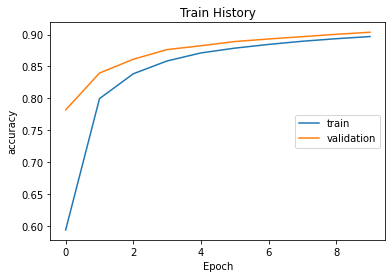

In [20]:
show_train_history(train_history,'accuracy','val_accuracy')

顯示訓練損失

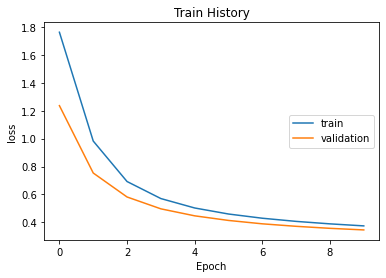

In [21]:
show_train_history(train_history,'loss','val_loss')